# Hands-on 1: Perceptron Notebook (Tutorial)



---



Por: **Cesar Balam Espinosa Nuñez**

Para la materia: **Clasificación inteligente de datos**



---



## 1 Fundamentos de la técnica

El Perceptrón se refiere a un algoritmo de aprendizaje supervisado que realiza clasificaciones binarias (un valor u otro).

Además, es un clasificador lineal, es decir, que encuentra ya sea una linea ($\mathbb{R}^2$), un plano ($\mathbb{R}^3$) o un hiperplano ($\mathbb{R}^n$, $n > 3$) que sea la que divida a los datos.

Inventado en el año 1957 por Frank Rosenblatt en el Laboratorio Aeronáutico de la Universidad de Cornell.

Hoy en día se utiliza como el componente más básico de las redes neuronales, es una neurona artificial simple.



---



## 2 Modelo matemático del Perceptrón

El Perceptrón sigue dos pasos principales para hacer una predicción:

**1-** Cálculo de la Entrada Neta ($z$): Primero, calcula una suma ponderada de las características (features) de entrada. A esta suma se le añade un término de sesgo (bias).

Para una muestra $x$ con $n$ características ($x_1, x_2, ..., x_n$), la entrada neta $z$ se calcula como:$z = (w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n) + b$

Donde:

*    $w$ es el vector de pesos (weights). Cada característica $x_i$ tiene un peso $w_i$ asociado, que el modelo aprende.

*    $b$ es el sesgo (bias), un término independiente que permite que la línea de decisión se desplace (no tenga que pasar por el origen).

En notación vectorial, esto se simplifica a:$z = w^T \cdot x + b$

**2-** Función de Activación (Función Escalón):La salida $z$ se pasa a través de una función de activación, que en el Perceptrón clásico es una función escalón de Heaviside. Esta función decide la clase final.

$\hat{y} = \phi(z)$La función $\phi(z)$ se define como:

*    $\phi(z) = 1$ (Clase Positiva) si $z \ge 0$

*    $\phi(z) = 0$ (o -1) (Clase Negativa) si $z < 0$

¿Cómo aprende (Regla de Aprendizaje del Perceptrón)?El modelo ajusta sus pesos ($w$) y sesgo ($b$) utilizando los errores de clasificación. Por cada muestra de entrenamiento $x_i$:

*   Calcula la predicción $\hat{y}_i$.

*   Calcula el error: $(y_i - \hat{y}_i)$, donde $y_i$ es la etiqueta real.

*   Actualiza los pesos: $\Delta w_j = \eta (y_i - \hat{y}_i) x_{j,i}$

*   Actualiza el sesgo: $\Delta b = \eta (y_i - \hat{y}_i)$

Donde $\eta$ (eta) es la tasa de aprendizaje (learning rate), un valor pequeño (ej. 0.1) que controla el tamaño del ajuste. Si la predicción es correcta ($y_i = \hat{y}_i$), el error es 0 y no hay actualización.



---



## 3. Descripción de la librería y funciones usadas
- **numpy:** para operaciones matemáticas y manejo de arreglos.
- **pandas:** para manipular datasets como tablas.
- **seaborn:** para visualizaciones especificas.
- **matplotlib:** para visualización de datos.
- **scikit-learn (sklearn):**
  - `datasets`: para generar conjuntos de datos de prueba.
  - `model_selection.train_test_split`: para dividir los datos.
  - `linear_model.Perceptron`: implementación del algoritmo Perceptrón.
  - `metrics.accuracy_score`: para evaluar el desempeño del modelo.



---



## 4 Pipeline

### 4.1 Feature Engineering

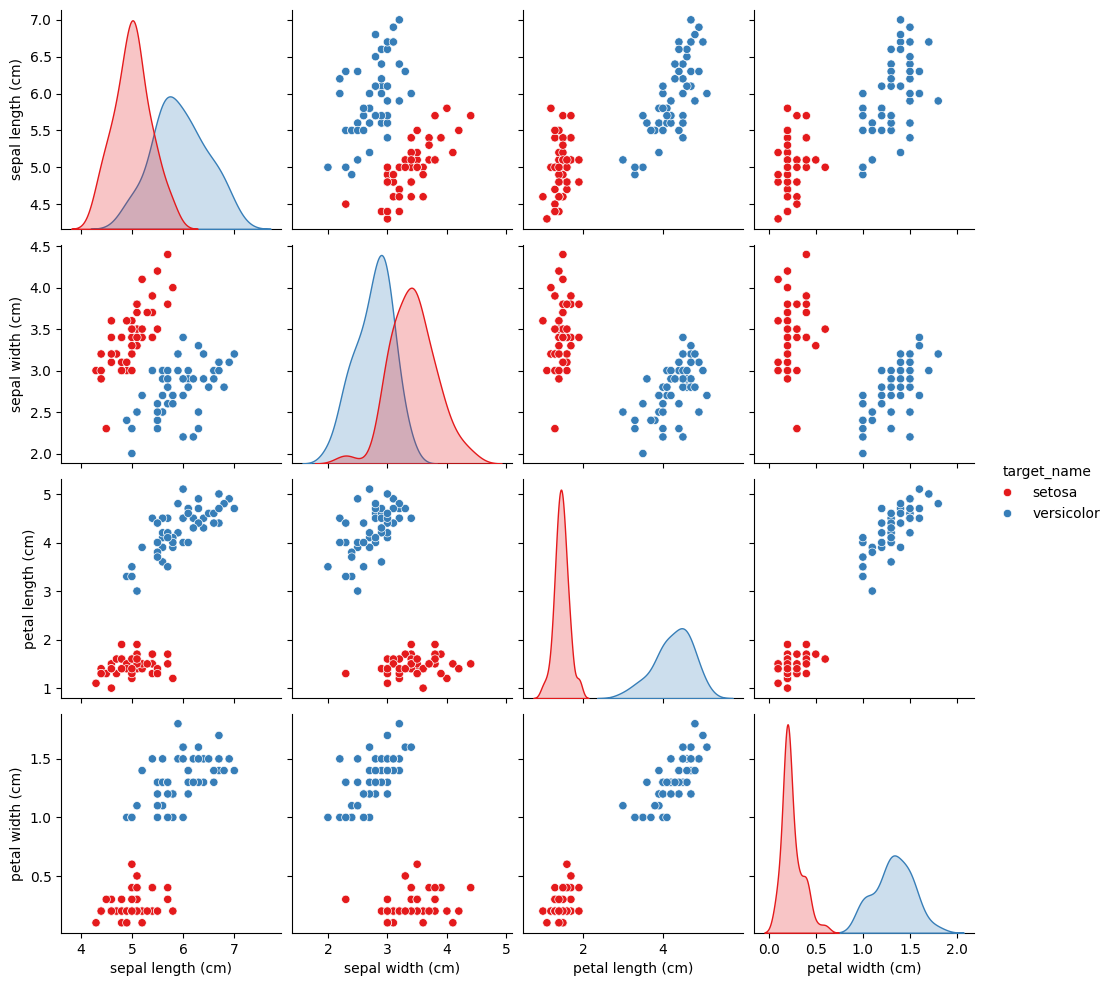

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Cargar el dataset iris
iris = load_iris()

# Guardarlo en un dataframe
df_columns = iris.feature_names + ['target']
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=df_columns)

# Filtrar solo setosa (0) y versicolor (1)
df = df[df["target"].isin([0, 1])]

# Dividir los datos en columnas y objetivo
X = df.copy()
X = X.drop("target", axis=1)
Y = df["target"]

# Usado al final para visualizacion
df_all = df.copy()

# Mapear los números a nombres de clases y quitar la columna target para que no salga en el plot
target_names = dict(enumerate(iris.target_names))
df['target_name'] = df['target'].map(target_names)
df = df.drop("target", axis=1)

# Graficar usando los nombres
sns.pairplot(df, hue='target_name', palette='Set1')
plt.show()

In [127]:
"""
A partir del pairplot puedo determinar cuales columnas me resultan más útiles para clasificar.
Yo escojo en esta ocasión las variables petal length y sepal width porque utilizan una escala similar y asi no hay que usar un Scaler.
Ademas los datos muestran una separacion clara para un modelo de clasificacion lineal.

"""

# Elimino los otros campos del input
X = X[["petal length (cm)", "sepal width (cm)"]].values
Y = Y.values

### 4.2 Model Selection
Para esta tarea se opta por un clasificador lineal (Perceptrón) porque:
- Se busca un modelo sencillo y facil de interpretar.
- El conjunto de datos es linealmente separable.
- Para una cantidad chica de datos, el aprendizaje es rápido y eficiente.

### 4.3 Model Training

In [128]:
# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, Y_train)

# Pesos y bias del modelo
weights = model.coef_[0]
bias = model.intercept_[0]

print(f"Pesos: {weights}")
print(f"Termino independiente: {bias}")

Pesos: [ 0.59 -0.53]
Termino independiente: -0.1


### 4.4 Prediction

In [129]:
# Función para probar patrones
def test_case(modelo, X):
    pred = model.predict([X])[0]
    print(f"Entrada: {X} → Clase predicha: {iris.target_names[int(pred)]}")

# Pruebas
print("Pruebas individuales:")
test_case(model, X_test[0])
test_case(model, X_test[1])
test_case(model, X_test[2])

Pruebas individuales:
Entrada: [5.1 2.7] → Clase predicha: versicolor
Entrada: [4.  2.3] → Clase predicha: versicolor
Entrada: [4.8 3.2] → Clase predicha: versicolor


### 4.5 Model Evaluation

Exactitud del modelo: 100.00%


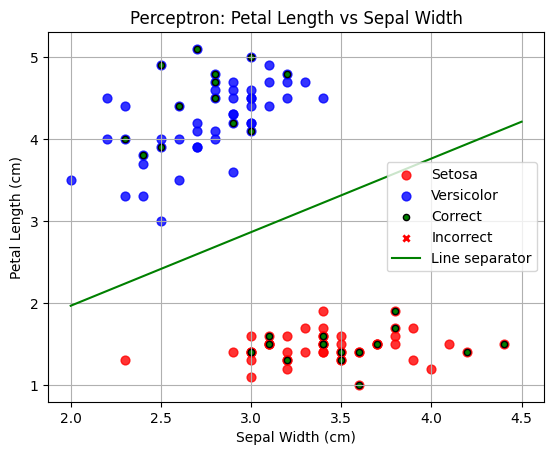

In [130]:
# Calcular exactitud del modelo e imprimirla
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test)
print(f"Exactitud del modelo: {(accuracy * 100):.2f}%")

# Identificar aciertos y errores (Usando Y_pred y Y_test del conjunto de prueba)
correctos = Y_pred == Y_test
incorrectos = ~correctos

plt.figure()

setosa_data = df_all[df_all["target"] == 0]
versicolor_data = df_all[df_all["target"] == 1]

# Graficamos todos los puntos originales
# Eje X: sepal width (cm)
# Eje Y: petal length (cm)
plt.scatter(setosa_data["sepal width (cm)"], setosa_data["petal length (cm)"], label="Setosa", color="red", s=40, alpha=0.8)
plt.scatter(versicolor_data["sepal width (cm)"], versicolor_data["petal length (cm)"], label="Versicolor", color="blue", s=40, alpha=0.8)

# X fue entrenado con: [ "petal length (cm)", "sepal width (cm)" ]
# X_test[..., 0] es "petal length (cm)"
# X_test[..., 1] es "sepal width (cm)"
# La gráfica usa: (Eje X: "sepal width (cm)", Eje Y: "petal length (cm)")

# Puntos correctamente clasificados
# Eje X: X_test[correctos, 1] (sepal width)
# Eje Y: X_test[correctos, 0] (petal length)
plt.scatter(X_test[correctos, 1], X_test[correctos, 0],
            c='green', marker='o', s=20, linewidth=1, edgecolors='k', label='Correct')

# Puntos mal clasificados
# Eje X: X_test[incorrectos, 1] (sepal width)
# Eje Y: X_test[incorrectos, 0] (petal length)
plt.scatter(X_test[incorrectos, 1], X_test[incorrectos, 0],
            c='red', marker='x', s=20, linewidth=2, label='Incorrect')

# Límite de separación
x_values = np.linspace(2, 4.5, 100)

w_petal_length = weights[0] # Peso de la variable en el Eje Y de la gráfica
w_sepal_width = weights[1] # Peso de la variable en el Eje X de la gráfica
y_values = (-w_sepal_width / w_petal_length) * x_values - bias / w_petal_length

# Linea de separacion resultante
plt.plot(x_values, y_values, '-g', label="Line separator")

# Grafico del modelo con resultados
plt.title("Perceptron: Petal Length vs Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid()
plt.legend()

plt.show()

## 5 Referencias Bibliográficas

- Garau, G. (2021, March 31). Perceptrón Simple: Definición y Propiedades - Damavis Blog. Damavis Blog - Data - Machine Learning - Visualization. https://blog.damavis.com/perceptron-simple-definicion-matematica-y-propiedades/

- Perceptron. (2025). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

- Daniel. (2022, March 7). Perceptrón: ¿qué es y para qué sirve? DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

- OMES [@OMES-va]. (s/f). Perceptrón en Python: Clasifica Iris Setosa y Versicolor con Scikit-learn 🤖🧠 [[Object Object]]. Youtube. Recuperado el 5 de noviembre de 2025, de https://www.youtube.com/watch?v=h1ae43Z6uIE